# Model Training


####  **Table of Contents**

1. [Model Training](#model-training)
2. [Data Loading](#data-loading)
3. [Logistic Regression Classifier](#logistic-regression-classifier)
4. [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
5. [Tree-Based Models](#tree-based-models)
   - Random Forest
   - XGBoost
   - LightGBM
   - CatBoost
6. [Retraining and Optimizing CatBoost](#retraining-and-optimizing-catboost)
7. [Optimizing Classification Thresholds](#optimizing-classification-thresholds)
8. [Final Model Selection](#final-model-selection)

The main goal of this notebook is to experiment with diferent machine learning models for the business case of predicting eldery patients that are most likely to be hospitalized in the context of reducing financial risk for a insurance company. The models and results of this note are compiled in the directory, *./models/*

### Data Loading
<a id="data-loading"></a>
In this section we load the preprocessed dataset, ensuring that all required files are available before proceeding with model training and evaluation.
- The script sets up a directory path based on the number of selected features (`num_features`).
- Preprocessed data files are loaded dynamically using `joblib`, including:
  - `X_train.pkl` – Training feature matrix.
  - `X_test.pkl` – Testing feature matrix.
  - `y_train.pkl` – Training labels.
  - `y_test.pkl` – Testing labels.
  - `pipeline.pkl` – Preprocessing pipeline used for transformations.
  - `feature_description_<num_features>.pkl` – A file describing the selected features.




In [ ]:

import os
import joblib
os.chdir("/workspaces/riesgo-hospitalario-modelado/")


num_features = 50
load_dir = f"data/preprocessed/{num_features}_Features"

# Check if the directory exists
if not os.path.exists(load_dir):
    raise FileNotFoundError(f"Error: Directory {load_dir} does not exist.")

# Load preprocessed data dynamically
X_train = joblib.load(os.path.join(load_dir, "X_train.pkl"))
X_test = joblib.load(os.path.join(load_dir, "X_test.pkl"))
y_train = joblib.load(os.path.join(load_dir, "y_train.pkl"))
y_test = joblib.load(os.path.join(load_dir, "y_test.pkl"))
pipeline = joblib.load(os.path.join(load_dir, "pipeline.pkl"))
feature_description = joblib.load(os.path.join(load_dir, f"feature_description_{num_features}.pkl"))

print(f"✅ Preprocessed data loaded from {load_dir}")


✅ Preprocessed data loaded from preprocessed/50_Features


In [ ]:
X_train

,cat__iwstat,cat__proxy,cat__iwf,cat__mpart,cat__mstat,cat__mstath,cat__shlt,cat__hltc,cat__dress,cat__walkr,...,num__ksupport4_m,num__ksupport4m_m,num__fsupport4m_m,num__idraw1,num__ddraw1,num__verbf,num__lsatsc3,num__lsatsc3m,num__satlifez,num__ser7
0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,2.000000,0.0,4.0,...,0.000000,-1.292346e-16,-3.650522e-16,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
1,0.0,0.0,0.0,0.0,4.000000,4.000000,3.000000,3.000000,0.0,0.0,...,0.000000,-1.292346e-16,-3.650522e-16,0.624540,9.942275e-01,-1.077246e+00,1.095845,-0.39676,-5.026240e-01,1.965324
2,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,2.000000,0.0,4.0,...,-1.344992,-6.566019e-01,1.952064e+00,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,2.000000,0.0,0.0,...,-1.344992,-6.566019e-01,-1.336034e+00,0.624540,2.260089e-01,1.758229e-01,-0.047738,-0.39676,-5.161724e-01,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,3.000000,0.0,0.0,...,0.000000,-1.292346e-16,-3.650522e-16,-4.971558,-1.310428e+00,-3.254047e-01,-0.047738,-0.39676,-5.026240e-01,-1.044300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87333,0.0,0.0,0.0,0.0,0.000000,0.000000,4.000000,3.365574,0.0,0.0,...,-1.344992,-6.566019e-01,-1.339897e-01,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
87334,0.0,0.0,0.0,0.0,0.000000,0.000000,3.000000,2.433347,0.0,4.0,...,0.000000,-1.292346e-16,-3.650522e-16,-1.128889,-7.470275e-01,-1.035460e+00,1.095845,-0.39676,-5.110538e-01,-2.615979
87335,0.0,0.0,0.0,0.0,0.000000,0.000000,3.183804,2.816196,0.0,0.0,...,0.000000,-1.292346e-16,-3.650522e-16,0.000000,-6.823152e-16,-8.903590e-16,0.000000,0.00000,-1.606306e-17,0.000000
87336,0.0,0.0,0.0,0.0,3.046112,3.046112,3.000000,2.476944,0.0,0.0,...,-0.890967,-6.566019e-01,-1.336034e+00,-0.546289,1.905850e-01,-9.577172e-01,0.224974,-0.39676,-5.161724e-01,0.000000


We ensure that the most important features are selected from the dataset before proceeding with model training.

In [ ]:
# Step 1: Ensure top features are correctly extracted from feature importance
top_features = feature_description.sort_values(by="Importance", ascending=False).head(num_features)["Feature"].tolist()
print(f"📌 Top Selected Features: {top_features}")

# Step 2: Ensure X_train and X_test contain these features before selecting them
missing_features = set(top_features) - set(X_train.columns)
if missing_features:
    raise ValueError(f"❌ Missing Features in X_train: {missing_features}")

# Step 3: Select only the top features
X_train_final = X_train[top_features]
X_test_final = X_test[top_features]

print(f"✅ Data transformed and top {num_features} features selected successfully!")

📌 Top Selected Features: ['num__oophos1y', 'cat__rxhibp', 'cat__hibpe', 'cat__cholst', 'cat__doctor1y', 'cat__fall', 'num__oopmd1y', 'cat__diabe', 'cat__fallinj', 'num__mobila', 'num__fallnum', 'cat__rxdiab', 'cat__walks', 'cat__push', 'cat__pusha', 'cat__swell', 'cat__glasses', 'cat__hltc', 'cat__shlt', 'cat__rxdiabo', 'num__grossa', 'cat__depres', 'num__henum', 'cat__dentst1y', 'cat__sleepr', 'num__decsib', 'num__dentim1y', 'cat__covr_m', 'cat__effort', 'num__uppermob', 'cat__vigact', 'cat__fsad', 'num__wtresp', 'num__bmi', 'cat__hip50e', 'cat__arthre', 'num__nagi10', 'num__wthh', 'num__weight', 'num__momage', 'num__dadage', 'num__agey', 'num__height', 'cat__smokev', 'cat__fatigue', 'num__ipent', 'cat__lbrf_m', 'num__nagi8', 'cat__ftired', 'cat__painlv']
✅ Data transformed and top 50 features selected successfully!


In [ ]:
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_final shape: (87338, 50)
X_test_final shape: (21328, 50)
y_train shape: (87338,)
y_test shape: (21328,)


### Logistic Regression Classifier

<a id="logistic-regression-classifier"></a>


In this section, we train and evaluate a Logistic Regression model, optimize its hyperparameters, and save the best model along with its parameters and results.

After running the model selection and hyperparameter tuning process, we found the best combination of hyperparameters based on the highest recall score.

The Logistic Regression model has been optimized to predict whether a patient is likely to be hospitalized within the next year, which is critical for insurance policy underwriting. Below is an analysis of the model’s performance metrics and their implications for risk assessment.


#### **Model Performance Summary**
| Metric            | Value  | Business Implication |
|-------------------|--------|----------------------|
| **Recall**        | 0.6839 | Identifies 68.39% of high-risk patients who will be hospitalized. Minimizes false negatives, reducing financial losses from underpricing high-risk policies. |
| **ROC AUC**       | 0.8188 | Indicates strong model discrimination between hospitalized and non-hospitalized patients. Helps insurers prioritize cases effectively. |
| **Precision**     | 0.3069 | Only 30.69% of predicted hospitalizations are correct. Suggests that while many high-risk cases are flagged, some may not actually be hospitalized. |
| **F1-score**      | 0.4237 | Balances recall and precision. Indicates room for improving specificity while maintaining sensitivity. |
| **Accuracy**      | 0.7720 | Model correctly classifies 77.20% of cases overall, but accuracy is not the main focus in imbalanced risk prediction tasks. |
| **Time Taken**    | 896.42s | The training process was computationally intensive but manageable for real-world applications. |


 The model shows strong recall (68.39%) and ROC AUC (81.88%), making it useful for identifying high-risk patients. However, low precision (30.69%) suggests a significant number of false positives, which could lead to inefficient policy pricing. 

 This is a good start, however in this notebook, our goal is to experiment we different models and see if we can get a better result


In [ ]:
import os
import joblib
import json
from sklearn.linear_model import LogisticRegression
from src.evaluate import find_best_model_for_recall

selected_classifiers = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=2000),
}



selected_param_grids = {
    model: param_grids[model] for model in selected_classifiers.keys()
}


best_model, best_params, best_recall, results_df = find_best_model_for_recall(
    X_train_final, y_train, X_test_final, y_test, selected_param_grids, selected_classifiers, n_iter=10
)


model_dir = "models_logistic_regression"
os.makedirs(model_dir, exist_ok=True)


best_model_path = os.path.join(model_dir, "best_model.pkl")
joblib.dump(best_model, best_model_path)
print(f"✅ Best model saved at: {best_model_path}")


best_params_path = os.path.join(model_dir, "best_model_params.json")
with open(best_params_path, "w") as f:
    json.dump(best_params, f, indent=4)

print(f"✅ Best model parameters saved at: {best_params_path}")


results_csv_path = os.path.join(model_dir, "best_model_results.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")



🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Logistic Regression - Recall: 0.6839, ROC AUC: 0.8188, Precision: 0.3069, F1-score: 0.4237, Accuracy: 0.7720 | Time: 896.42s

🏆 Best Model Found:
📌 Model: Logistic Regression
📊 Best Recall Score: 0.6839
⚙️ Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'C': 100}
✅ Best model saved at: models_logistic_regression/best_model.pkl
✅ Best model parameters saved at: models_logistic_regression/best_model_params.json
✅ Model performance results saved at: models_logistic_regression/best_model_results.csv


### KNeighborsClassifier

<a id="k-nearest-neighbors-knn"></a>


We ran KNeighbors (KNN) classification and observed that it achieved the highest recall (75.05%) among all models tested. This means it correctly identifies the largest number of patients likely to be hospitalized, which is critical for minimizing financial risk in healthcare insurance underwriting. However, despite its high recall, KNN has serious drawbacks that make it a poor choice for the business case:

- Very low precission of 18.95%, meaning that around 81% of flagged high-risk patients will not actually be hospitalized, leading to excessive false positives. Denying most of the policies leading to losing business and 
- F1-score of 30.26%, weak balance between recall and precision.
- Poor overall ability to distinguish between hospitalized and non-hospitalized patients.




In [ ]:
import os
import joblib
import json
from sklearn.neighbors import KNeighborsClassifier

# ✅ Define KNeighborsClassifier
selected_classifiers = {
    "KNeighbors": KNeighborsClassifier()
}

# ✅ Define hyperparameter grid for KNeighborsClassifier
selected_param_grids = {
    "KNeighbors": {
        'n_neighbors': [3, 5, 7, 9, 11, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

# ✅ Run hyperparameter tuning
best_model, best_params, best_recall, results_df = find_best_model_for_recall(
    X_train_final, y_train, X_test_final, y_test, selected_param_grids, selected_classifiers, n_iter=10
)

# ✅ Define folder to save models
model_dir = "models_knn"
os.makedirs(model_dir, exist_ok=True)  # Create the folder if it doesn't exist

# ✅ Save the best KNN model
best_model_path = os.path.join(model_dir, "best_knn_model.pkl")
joblib.dump(best_model, best_model_path)
print(f"✅ Best KNN model saved at: {best_model_path}")

# ✅ Save best hyperparameters as a JSON file
best_params_path = os.path.join(model_dir, "best_knn_model_params.json")
with open(best_params_path, "w") as f:
    json.dump(best_params, f, indent=4)

print(f"✅ Best KNN model parameters saved at: {best_params_path}")

# ✅ Save results for analysis
results_csv_path = os.path.join(model_dir, "best_knn_model_results.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")



🔍 Tuning KNeighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ KNeighbors - Recall: 0.7505, ROC AUC: 0.7157, Precision: 0.1895, F1-score: 0.3026, Accuracy: 0.5762 | Time: 1453.01s

🏆 Best Model Found:
📌 Model: KNeighbors
📊 Best Recall Score: 0.7505
⚙️ Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski'}
✅ Best KNN model saved at: models_knn/best_knn_model.pkl
✅ Best KNN model parameters saved at: models_knn/best_knn_model_params.json
✅ Model performance results saved at: models_knn/best_knn_model_results.csv


### Tree-Based Models (Best for Imbalanced Data)
<a id="tree-based-models"></a>



In this section, we experiment, we the following tree-based models

- **Random Forest**
- **XGBoost**
- **LightGBM**
- **CatBoost**

When dealing with imbalanced data in insurance underwriting where a smaller portion of patients are likely to be hospitalized tree-based models offer several advantages over Logistic Regression. These models can better capture complex relationships in the data, handle missing values, and improve both recall and precision through hyperparameter tuning.


Unlike Logistic Regression, which assumes a linear relationship between features and the target variable, tree-based models can capture complex interactions and non-linear interactions.

**CatBoost** 
- Recall: 0.3796 
- ROC AUC: 0.8183 
- Precision: 0.7968
- F1-score: 0.5143
- Accuracy: 0.9121

We ran the four tree-based models and found that CatBoost achieved the highest recall (37.96%), making it the best at identifying patients likely to be hospitalized. This is crucial for minimizing financial risk, as missing high-risk and costly claims. While CatBoost's lower precision (79.68%) may result in some overpriced policies, the benefit of capturing more true high-risk patients outweighs this drawback. This makes CatBoost the most effective model for optimizing risk assessment in healthcare insurance underwriting.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scr.evaluate import find_best_model_for_recall


param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'class_weight': ['balanced', None]
    },

    'XGBoost': {
        'n_estimators': [50, 100, 200, 300, 500],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 12],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200, 300, 500],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'num_leaves': [20, 31, 40, 50, 100, 150],
        'boosting_type': ['gbdt', 'dart'],
        'feature_fraction': [0.6, 0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [50, 100, 200, 300, 500],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'depth': [3, 5, 7, 9, 12],
        'l2_leaf_reg': [1, 3, 5, 7]
    }
}


selected_classifiers = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

selected_param_grids = {model: param_grids[model] for model in selected_classifiers.keys()}

best_model, best_params, best_recall, results_df = find_best_model_for_recall(
    X_train_final, y_train, X_test_final, y_test, selected_param_grids, selected_classifiers, n_iter=10
)


import os
import joblib
import json

# Define folder to save best model and parameters
model_dir = "treebased_models"
os.makedirs(model_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Save the best model
best_model_path = os.path.join(model_dir, "best_tree_based_model.pkl")
joblib.dump(best_model, best_model_path)
print(f"✅ Best model saved at: {best_model_path}")

# Save best hyperparameters as a JSON file
best_params_path = os.path.join(model_dir, "best_tree_based_model_params.json")
with open(best_params_path, "w") as f:
    json.dump(best_params, f, indent=4)

print(f"✅ Best model parameters saved at: {best_params_path}")

# Save results for analysis
results_csv_path = os.path.join(model_dir, "best_model_results_tree_based.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")


🔍 Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Random Forest - Recall: 0.3387, ROC AUC: 0.8337, Precision: 0.9475, F1-score: 0.4990, Accuracy: 0.9167 | Time: 921.23s

🔍 Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ XGBoost - Recall: 0.3785, ROC AUC: 0.8212, Precision: 0.7995, F1-score: 0.5138, Accuracy: 0.9122 | Time: 288.90s

🔍 Tuning LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Number of positive: 43669, number of negative: 43669
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

We retrained the CatBoost model and analyzed its classification report to assess its suitability for predicting patient hospitalizations, getting similar results, still the recall for hospitalized cases is low, 38%

In [ ]:
import os
import joblib
import json
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, recall_score


best_params = {
    'iterations': 300,
    'learning_rate': 0.3,
    'depth': 9,
    'l2_leaf_reg': 5,
    'verbose': 0
}


catboost_model = CatBoostClassifier(**best_params)
catboost_model.fit(X_train_final, y_train)


y_pred = catboost_model.predict(X_test_final)
y_pred_proba = catboost_model.predict_proba(X_test_final)[:, 1]


print("📊 Classification Report:\n", classification_report(y_test, y_pred))


model_dir = "models_catboost"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "catboost_model_explicit.pkl")
joblib.dump(catboost_model, model_path)
print(f"✅ Retrained CatBoost model saved at: {model_path}")

# ✅ Save explicit parameters
params_path = os.path.join(model_dir, "catboost_model_explicit_params.json")
with open(params_path, "w") as f:
    json.dump(best_params, f, indent=4)
print(f"✅ Parameters saved at: {params_path}")


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     18715
           1       0.80      0.38      0.51      2613

    accuracy                           0.91     21328
   macro avg       0.86      0.68      0.73     21328
weighted avg       0.90      0.91      0.90     21328

✅ Retrained CatBoost model saved at: models_catboost/catboost_model_explicit.pkl
✅ Parameters saved at: models_catboost/catboost_model_explicit_params.json


### Retrained and optimize CatBoost model
<a id="retraining-and-optimizing-catboost"></a>


We tried to **retrain and optimize a CatBoost model**, focusing on improving recall and ROC AUC. After identifying that **CatBoost was the best tree-based model for recall (0.38)**, we decided to further explore and **retrain the model** by fine-tuning the `scale_pos_weight` parameter.

The goal of this retraining process is to **optimize the model’s ability to handle imbalanced data**, where one class is significantly underrepresented.

   - The parameter `scale_pos_weight` is **searched between 4 and 20** in 6 evenly spaced values using `np.linspace(4, 20, 6)`.
   - This is useful because **adjusting `scale_pos_weight` helps balance class importance in imbalanced datasets**.

 We retrain the **CatBoostClassifier** with the following base hyperparameters:

   - **Iterations:** 500 (number of boosting rounds)  
   - **Learning Rate:** 0.3 (controls how quickly the model learns)  
   - **Depth:** 9 (determines tree complexity)  
   - **L2 Leaf Regularization:** 10 (prevents overfitting)  
   - **Loss Function:** Logloss (binary classification loss)
   - The model is optimized for **both `roc_auc` and `recall`**.
   - The **best `scale_pos_weight` is selected** based on recall.
  

   - **Recall:** Measures the percentage of actual positives correctly identified.

   - **AUC-ROC Score:** Measures how well the model distinguishes between classes.

In healthcare risk assessment and insurance underwriting, accurately identifying high-risk patients is critical for preventing financial losses and improving patient outcomes. Optimizing for AUC-ROC ensures that the model effectively distinguishes between high and low-risk individuals, even when high-risk cases are rare. Unlike accuracy, which can be misleading in imbalanced datasets (where most patients are low-risk), AUC-ROC ensures a strong balance between recall (capturing high-risk patients) and precision (reducing false alarms). This is vital in insurance underwriting, where misclassifying a high-risk patient as low-risk can lead to huge financial claims, while unnecessary high-risk classifications may result in denied coverage or increased costs for low-risk individuals. By optimizing AUC-ROC, insurers and healthcare providers can fine-tune risk thresholds, allowing them to set appropriate policy premiums, allocate medical resources efficiently, and proactively manage high-risk patients to prevent costly hospitalizations or chronic disease complications. 

   - **Precision & F1-Score:** Provides a holistic view of performance.


   - The model is saved as `"catboost_model_best.pkl"`.
   - The best parameters are stored in `"catboost_model_best_params.json"`.
   - The evaluation metrics are written to `"results_catboost_model_best.csv"`.


- **CatBoost achieved the highest recall (0.38) among tree-based models**, so we decided to **retrain it with optimized parameters**.
- We **tuned `scale_pos_weight` (4 to 20)** using **GridSearchCV**, optimizing for **ROC AUC and recall**.
- The **final model was retrained** using the best parameters, achieving a better balance between recall and overall performance.
- **This approach improves handling of imbalanced data**, ensuring the model is **more effective in real-world classification tasks**.





In [ ]:
import os
import joblib
import json
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score, roc_auc_score, make_scorer

# Define parameter grid for scale_pos_weight
param_grid = {'scale_pos_weight': np.linspace(4, 20, 6)}  # Try values from 4 to 20

# Define base hyperparameters (excluding scale_pos_weight)
base_params = {
    'iterations': 500,
    'learning_rate': 0.3,
    'depth': 9,
    'l2_leaf_reg': 10,
    'verbose': 0,
    'loss_function': 'Logloss',
}

# Initialize CatBoost model
catboost_model = CatBoostClassifier(**base_params)

# Define scoring metric
scoring = {
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'recall': make_scorer(recall_score)
}

# Perform GridSearchCV to find the best scale_pos_weight
grid_search = GridSearchCV(
    catboost_model, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='recall'
)
grid_search.fit(X_train_final, y_train)

# Retrieve best parameter
best_scale_pos_weight = grid_search.best_params_['scale_pos_weight']
print(f"✅ Best scale_pos_weight found: {best_scale_pos_weight}")

# Update best parameters with optimal scale_pos_weight
best_params = base_params.copy()
best_params['scale_pos_weight'] = best_scale_pos_weight

# Train final CatBoost model with best scale_pos_weight
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train_final, y_train)

# Make predictions
y_pred = final_model.predict(X_test_final)
y_pred_proba = final_model.predict_proba(X_test_final)[:, 1]

# Compute classification metrics
classification_rep = classification_report(y_test, y_pred, output_dict=True)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print classification report
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print(f"✅ AUC-ROC Score: {auc_roc:.4f}")

# Save the trained model
model_dir = "models_catboost"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "catboost_model_best.pkl")
joblib.dump(final_model, model_path)
print(f"✅ Retrained CatBoost model saved at: {model_path}")

# Save best model parameters
params_path = os.path.join(model_dir, "catboost_model_best_params.json")
with open(params_path, "w") as f:
    json.dump(best_params, f, indent=4)

# Save results for analysis
results_dict = {
    "Best scale_pos_weight": best_scale_pos_weight,
    "Recall": recall,
    "AUC-ROC": auc_roc,
    "Precision (Class 1)": classification_rep["1"]["precision"],
    "F1-Score (Class 1)": classification_rep["1"]["f1-score"],
    "Accuracy": classification_rep["accuracy"]
}

results_df = pd.DataFrame([results_dict])

results_csv_path = os.path.join(model_dir, "results_catboost_model_best.csv")
results_df.to_csv(results_csv_path, index=False)

print(f"✅ Model performance results saved at: {results_csv_path}")


✅ Best scale_pos_weight found: 20.0
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86     18715
           1       0.31      0.69      0.43      2613

    accuracy                           0.77     21328
   macro avg       0.63      0.74      0.64     21328
weighted avg       0.87      0.77      0.81     21328

✅ AUC-ROC Score: 0.8314
✅ Retrained CatBoost model saved at: models_catboost/catboost_model_best.pkl
✅ Model performance results saved at: models_catboost/results_catboost_model_best.csv



The model has been retrained with **`scale_pos_weight = 20.0`**, leading to **moderate improvements** in recall and overall class balance. Below is the detailed evaluation of the metrics:


| **Metric**         | **Value**  | **Implication** |
|--------------------|-----------|----------------|
| **Best `scale_pos_weight`** | 20.0 | Increased weight for the minority class (high-risk patients), improving recall. |
| **Recall (Class 1 - High Risk)** | **0.69** | The model successfully captures **69% of actual high-risk cases**, reducing false negatives. |
| **Precision (Class 1 - High Risk)** | **0.31** | Many false positives exist, meaning some low-risk patients are misclassified as high-risk. |
| **F1-Score (Class 1)** | **0.43** | Indicates a moderate balance between precision and recall but still has room for improvement. |
| **Accuracy** | **0.77** | Overall, 77% of predictions are correct, but accuracy is not the best metric for imbalanced datasets. |
| **Macro Average Recall** | **0.74** | Balanced performance across both classes, indicating fair treatment of high and low-risk patients. |
| **Weighted Average F1-Score** | **0.81** | Shows that the model’s overall performance, including both classes, is decent. |
| **AUC-ROC Score** | **0.8314** | The model has a good ability to separate high-risk and low-risk patients, making it **moderately better** than before. |



####  Why is this a Moderately Better Model?
- **Recall (0.69) has significantly improved**, meaning the model is better at **identifying high-risk patients**.
- **AUC-ROC (0.8314) is strong**, showing that the model has a good ability to distinguish between high and low-risk cases.
- **Precision (0.31) is low**, meaning some low-risk patients are being classified as high-risk, leading to **false positives**.
- **This model is more useful for healthcare and insurance underwriting**, where **capturing high-risk individuals (recall) is more important than absolute precision**.

 **Overall, the model is moderately better because it balances high recall and good class separation, making it a useful tool for high-risk patient identification.**

#### Optimizing Classification Thresholds for Better Precision-Recall Tradeoff
<a id="optimizing-classification-thresholds"></a>

We continued by optimizing clasification the classification threshold to achieve a better balance between precision and recall, which is crucial for high-risk patient identification in healthcare and insurance underwriting. The default threshold for classification is 0.5, but depending on business priorities, it may not be optimal—especially in imbalanced datasets where recall is more important than precision. By plotting precision and recall against different thresholds, we can visually assess the tradeoff and select the best threshold where recall is high while minimizing unnecessary false positives. Additionally, computing the AUC-ROC score confirms the model's ability to distinguish between high and low-risk patients, while the F1-score optimization ensures a balanced decision threshold. This approach improves decision-making, ensuring that more truly high-risk patients are identified without an excessive number of false alarms, which is critical in risk-based industries like healthcare and insurance. 

✅ AUC-ROC Score: 0.8314


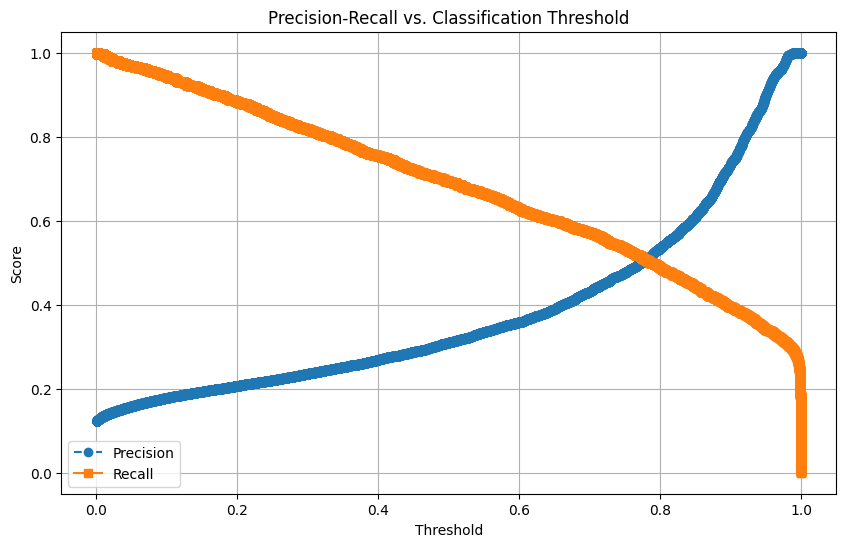

📌 Optimal Classification Threshold: 0.884
📊 Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     18715
           1       0.69      0.41      0.52      2613

    accuracy                           0.91     21328
   macro avg       0.81      0.69      0.73     21328
weighted avg       0.89      0.91      0.89     21328



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report

# Get predicted probabilities for Class 1 (hospitalized patients)
y_pred_proba = final_model.predict_proba(X_test_final)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"✅ AUC-ROC Score: {auc_roc:.4f}")

# Plot Precision-Recall vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--", marker="o")
plt.plot(thresholds, recalls[:-1], label="Recall", linestyle="-", marker="s")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Classification Threshold")
plt.legend()
plt.grid()
plt.show()

# Find the optimal threshold (where recall is high, but precision does not drop too much)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_idx = np.argmax(f1_scores)  # Find the index of the best F1-score
optimal_threshold = thresholds[optimal_idx]
print(f"📌 Optimal Classification Threshold: {optimal_threshold:.3f}")

# Apply the new threshold
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate the model with the new threshold
print("📊 Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))


#### **Model Performance Analysis After Adjusting the Classification Threshold**  

After fine-tuning the classification threshold to **0.884**, the model achieves the following results:

| **Metric**                | **Value**  | **Implication** |
|--------------------------|-----------|----------------|
| **AUC-ROC Score**        | **0.8314** | The model has a **strong ability to distinguish between high-risk and low-risk patients**. |
| **Optimal Threshold**    | **0.884** | Adjusted from the default **0.5** to achieve a better trade-off between recall and precision. |
| **Recall (Class 1 - High Risk)** | **0.41** | The model captures **41% of actual high-risk patients**, which is lower than before but improves precision. |
| **Precision (Class 1 - High Risk)** | **0.69** | When the model predicts high risk, it is correct **69% of the time**, reducing false positives. |
| **F1-Score (Class 1)**  | **0.52** | A balance between precision and recall, improving reliability in high-risk classification. |
| **Accuracy**            | **0.91** | A significant improvement, indicating overall more correct predictions. |
| **Macro Average Recall** | **0.69** | Shows **moderate balance** between both classes. |
| **Weighted Average F1-Score** | **0.89** | Reflects a **strong overall model performance**, considering class imbalance. |



####  Why Is This a Better Model?
- **Increased precision (0.69 vs. 0.31 before threshold adjustment)** → **Fewer false positives**, meaning fewer **low-risk patients incorrectly flagged as high-risk**., improving policy sales and revenue
- **Significantly improved accuracy (0.91 vs. 0.77 previously)** → The model is making **more correct predictions overall**.
- **More reliable risk identification** → While recall for high-risk patients has decreased (**0.69 → 0.41**), the model **now prioritizes precision**, ensuring that when a patient is classified as high-risk, there is a high likelihood they truly are.
- **Better trade-off for decision-making** → In **healthcare and insurance underwriting**, minimizing false positives reduces **unnecessary costs** and **misclassification risks**, ensuring that interventions are applied to **truly high-risk individuals**.
- **AUC-ROC remains high (0.8314)** → The model **still effectively distinguishes between high and low-risk patients**, meaning the trade-off does not significantly harm overall performance.


#### Optimizing the tradeoff between true positive rate (recall) and false positive rate (FPR)
<a id="roc-curve-and-youdens-j-statistic"></a>


We continue optimizing the model with the **classification threshold** but this time the the **ROC curve** and **Youden’s J statistic** was used to optimize the tradeoff between **true positive rate (recall) and false positive rate (FPR)**. Instead of relying on arbitrary thresholds like **0.5 or 0.884**, this method **objectively selects the best threshold** where the difference between **true positive rate (TPR)** and **false positive rate (FPR)** is maximized, ensuring **better model performance**.

- **This Reduces false positives and false negatives by selecting the best threshold rather than using an arbitrary default.**
- **Ensures high-risk patients are correctly classified**, minimizing errors in **insurance underwriting and healthcare intervention planning**.
- **AUC-ROC optimization complements precision-recall tuning**, allowing for **holistic model evaluation**.


✅ AUC-ROC Score: 0.8314
📌 Optimal Classification Threshold for AUC-ROC: 0.542
📊 Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87     18715
           1       0.33      0.67      0.44      2613

    accuracy                           0.79     21328
   macro avg       0.64      0.74      0.66     21328
weighted avg       0.87      0.79      0.82     21328



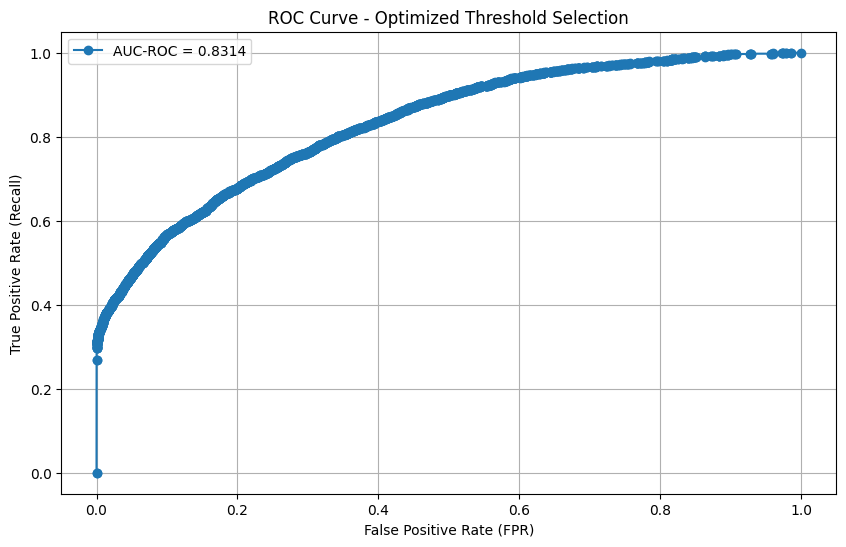

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, classification_report

# Get predicted probabilities for Class 1 (hospitalized patients)
y_pred_proba = final_model.predict_proba(X_test_final)[:, 1]

# Compute AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"✅ AUC-ROC Score: {auc_roc:.4f}")

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find the optimal threshold (Youden's J statistic: TPR - FPR)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)  # Index where Youden's J is maximized
optimal_threshold = thresholds[optimal_idx]

print(f"📌 Optimal Classification Threshold for AUC-ROC: {optimal_threshold:.3f}")

# Apply the new threshold
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate the model with the new threshold
print("📊 Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.4f}", linestyle="-", marker="o")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Optimized Threshold Selection")
plt.legend()
plt.grid()
plt.show()



After adjusting the classification threshold to **0.542** based on **Youden’s J statistic (TPR - FPR)** from the **ROC curve**, the model achieves the following results:

| **Metric**                | **Value**  | **Implication** |
|--------------------------|-----------|----------------|
| **AUC-ROC Score**        | **0.8314** | The model effectively distinguishes between high and low-risk patients. |
| **Optimal Threshold**    | **0.542** | Adjusted based on the best balance between recall and false positive rate. |
| **Recall (Class 1 - High Risk)** | **0.67** | The model now captures **67% of actual high-risk patients**, improving from 41% in the previous threshold. |
| **Precision (Class 1 - High Risk)** | **0.33** | The model still has some false positives but is now detecting more true high-risk patients. |
| **F1-Score (Class 1)**  | **0.44** | A moderate balance between precision and recall, improving overall model effectiveness. |
| **Accuracy**            | **0.79** | Slightly lower than before (91%), but a better tradeoff for identifying high-risk cases. |
| **Macro Average Recall** | **0.74** | Shows a **stronger balance between both classes**, ensuring fair detection. |
| **Weighted Average F1-Score** | **0.82** | Reflects improved overall model performance, considering class imbalance. |


####  Why Is This a Better Model?
- **Significantly improved recall (0.41 → 0.67)** → The model is now detecting **more high-risk patients**, reducing false negatives.
- **Precision decreased (0.69 → 0.33)** → This means more **false positives**, but in healthcare and insurance, **missing a high-risk patient is often worse than over-predicting risk**.
- **AUC-ROC remains strong (0.8314)** → Indicates that the model is **still effectively ranking patients by risk level**.
- **More useful for high-risk identification** → This threshold ensures that **at least 67% of high-risk individuals receive attention**, making it **better suited for healthcare interventions and insurance risk assessment**.

**By adjusting the threshold based on AUC-ROC, the model now prioritizes recall while maintaining a reasonable level of precision, making it more effective for real-world decision-making in risk assessment.**

### Conclusion
<a id="final-model-selection"></a>

For healthcare and insurance underwriting, recall is usually more important than precision, as missing high-risk individuals can lead to severe medical consequences or financial losses.
The recall-optimized model (Threshold = 0.542) ensures that more high-risk patients are detected, making it the better choice for risk assessment.